# Welcome Aboard!

🧩🚧 This is a starter notebook, a canvas for your creativity. Feel free to fork it, make it your own, and build upon it. Here, I'll provide a framework to kick-start your analysis. 

# Dataset Columns: Data Overview

This dataset is a window into the past, encompassing a variety of detains about the world's wonders. Here is a quick overview of the columns:

**Name** : The name of each wonder.

**Type** : The category,such as Ancient or Medieval.

**Latitude & Longitude** : Geographical coordinates.

**Location** :The physical location of the wonder.

**Wikipedia link** :A link to more information on Wikipedia.

**Picture link** :A URL to a picture of the wonder.

**Build in Year** :The year when the wonder was constructed.

**Image Base64** :Base64 encoded image data for visualization.

# Table of contents

1.Importing libraries

2.Loading data

3.Data exploration

4.Geographical analysis

5.Historical insights

6.Fin

# 1.Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import geopandas as gpd
import folium
from folium import IFrame
import base64
from io import BytesIO
from PIL import Image
from shapely.geometry import Point
from datetime import datetime

# Updated palette with a contrasting pink
palette = ["#708D81", "#A5C8B4", "#D3E4CD", "#CCA483", "#967860", "#D7A9E3", "#E06B8D"]  

sns.set(rc={"axes.facecolor":"#EFEAE4", "figure.facecolor":"#EFEAE4"})
cmap = colors.ListedColormap(palette)

import warnings
warnings.filterwarnings("ignore")

# 2.Loading data

**Unveiling the Mysteries**
Imagine opening a treasure chest that's been hidden away for centuries, filled with ancient maps, mysterious blueprints, and captivating stories of grandeur. That's precisely what our dataset is like. It's a collection of awe-inspiring tales about some of the most famous structures around the globe. Let's unlock this chest and embark on a journey of discovery! 🗝️🌏

🔍 **The First Glimpse**
As we lift the lid off our digital treasure chest, let's carefully explore its contents. We're about to get a first-hand look at the data - a crucial step in setting the stage for our analysis. Think of yourself as a detective, piecing together stories from clues hidden in plain sight. Ready to unveil the secrets? Let's dive in! 🕵️‍♂️💼

In [2]:
# Load the dataset
file_path = '/kaggle/input/wonders-of-world/WondersOfWorld_24.csv'
data = pd.read_csv(file_path)
data.head()

# Print the columns
print("Columns of the dataset:")
print(data.columns)

Columns of the dataset:
Index(['Name', 'Type', 'Latitude', 'Longitude', 'Location', 'Wikipedia link',
       'Picture link', 'Build in year', 'Image Base64'],
      dtype='object')


In [3]:
# Summary of DataPoints
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            50 non-null     object 
 1   Type            50 non-null     object 
 2   Latitude        50 non-null     float64
 3   Longitude       50 non-null     float64
 4   Location        50 non-null     object 
 5   Wikipedia link  50 non-null     object 
 6   Picture link    50 non-null     object 
 7   Build in year   39 non-null     object 
 8   Image Base64    50 non-null     object 
dtypes: float64(2), object(7)
memory usage: 3.6+ KB
None


In [4]:
# Summary statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,50,45,Great Pyramid of Giza,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,50,7,New7Wonders Foundation,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,50.0,NaN,NaN,NaN,30.357855,23.631071,-24.591944,26.06875,36.057778,40.943494,89.9999
Longitude,50.0,NaN,NaN,NaN,-8.164173,73.058891,-171.733333,-73.993681,2.61205,30.823864,147.7
Location,50,38,China,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wikipedia link,50,45,http://en.wikipedia.org/wiki/Great_Pyramid_of_...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Picture link,50,46,http://upload.wikimedia.org/wikipedia/commons/...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Build in year,39,33,2560 BC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Image Base64,50,45,iVBORw0KGgoAAAANSUhEUgAAAtAAAALQCAIAAAA2NdDLAA...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN



# Tidying Up the Map

Before we embark on our thrilling journey through the annals of history, let's ensure our map – the dataset – is pristine and ready for exploration. 🗺️🧹

Envision our dataset as an ancient map, filled with hidden clues and treasures waiting to be discovered. But, as with any old map, there are some wrinkles to smooth out and dust to clear:

Missing Pieces: Just like a timeworn map might have torn edges or faded paths, our dataset has some missing values that need addressing. We'll fill in these gaps or navigate around them, ensuring no crucial information is lost in our exploration.

Mending Broken Links: Over time, links to the past might become obscured or broken. We'll mend these links, ensuring every path leads to meaningful insights about these wonders.

Clarifying the Unclear: Sometimes, smudges and stains can mask important details. We'll clean these up, clarifying any ambiguities, so each landmark on our map stands out vividly.

By carefully tidying up our map, we ensure that every 'X' marking a wonder is clear and every path we take leads to accurate and illuminating discoveries. Let's roll up our sleeves and prepare our dataset for this adventure, leaving no stone unturned in our quest for knowledge! 🌟🔍

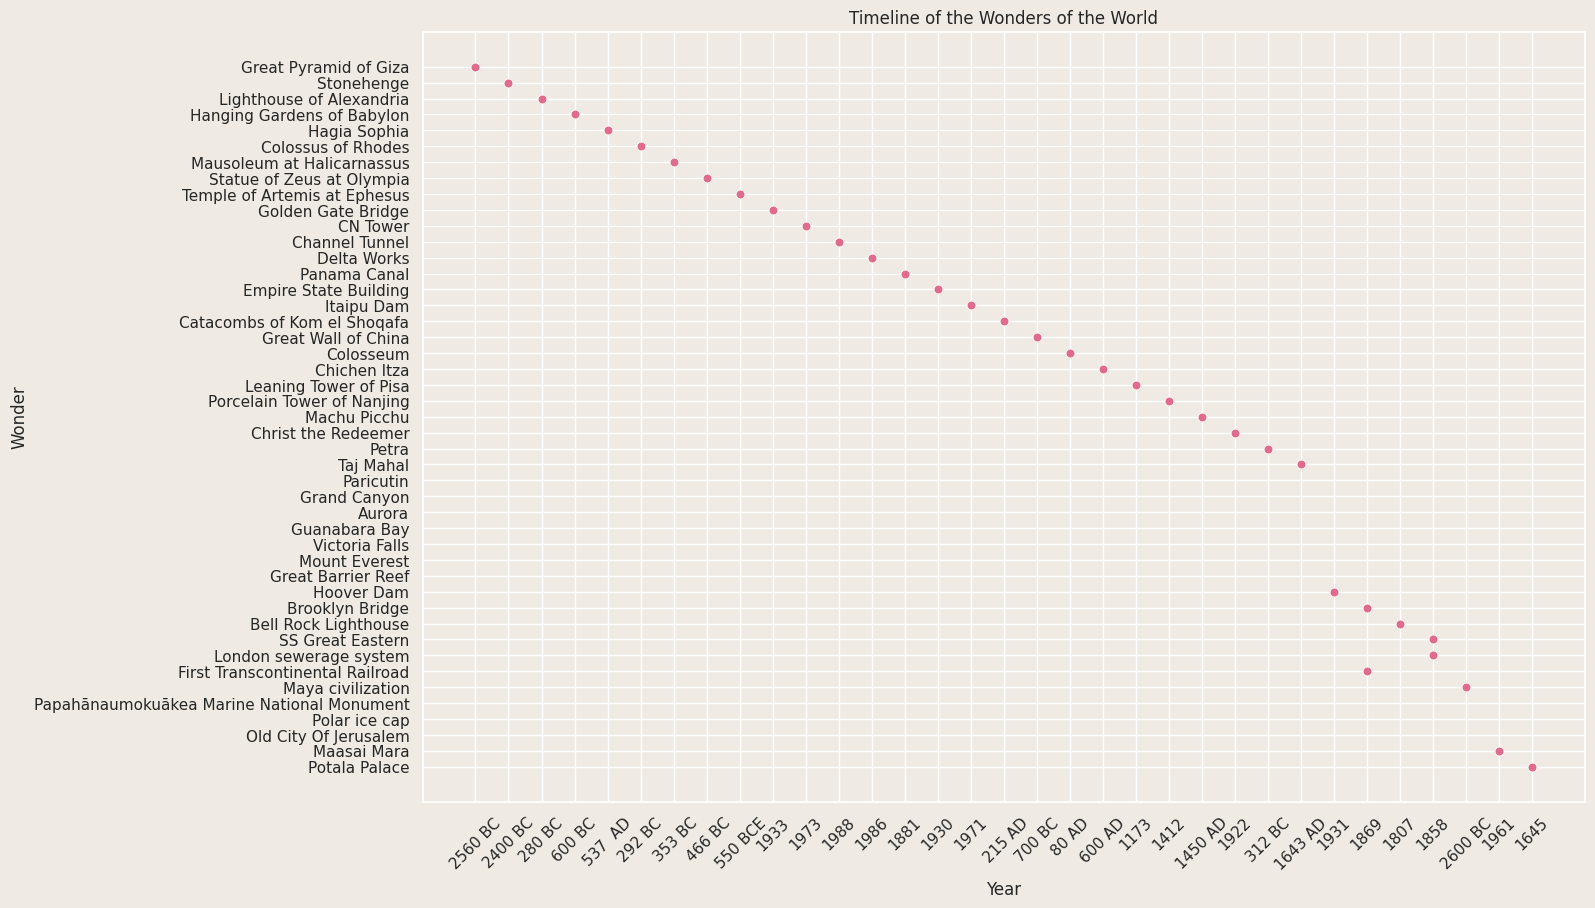

Build in year
2560 BC     2
1869        2
1881        2
700 BC      2
80 AD       2
1858        2
1807        1
1931        1
2600 BC     1
312 BC      1
1922        1
1450 AD     1
1412        1
1961        1
1173        1
600 AD      1
1643 AD     1
 215 AD     1
2400 BC     1
1971        1
1930        1
1986        1
1988        1
1973        1
1933        1
 550 BCE    1
 466 BC     1
 353 BC     1
292 BC      1
537  AD     1
600 BC      1
280 BC      1
1645        1
Name: count, dtype: int64


In [5]:
# Plotting
plt.figure(figsize=(15,10))
sns.scatterplot(x='Build in year', y='Name', data=data, color=palette[-1],s=40)
plt.title('Timeline of the Wonders of the World')
plt.xlabel('Year')
plt.ylabel('Wonder')
plt.xticks(rotation=45)
plt.show()

print(data["Build in year"].value_counts())

# Weaving through the ages: A historical tapestry

Weaving Through the Ages: A Historical Tapestry
Our visual exploration brings to life the timeline of the Wonders of the World. Spanning from the dawn of civilization to the modern day, each point on this timeline represents an epochal achievement of human ingenuity. Let's delve into the epochs that these wonders illuminate:

`Echoes of Antiquity`: Witness the ancient marvels such as the Great Pyramid of Giza, constructed circa 2560 BC. These structures stand as testaments to the grand ambitions of civilizations long past.

`Medieval Mastery`: Fast forward to the medieval times where wonders like the Leaning Tower of Pisa (1173 AD) showcase the era's architectural prowess and the flowering of Renaissance thought.

`Industrial Revolution and Beyond`: The 19th and 20th centuries mark an era of rapid innovation, with iconic structures like the Eiffel Tower (1889) and the Statue of Liberty (1886) symbolizing the industrial age's transformative power.

This chronology is more than mere dates; it's a narrative of humanity's unyielding drive to create and to leave a mark on the Earth that endures through the ages. As we prepare to rectify the timeline's dates, we appreciate the storied legacy these wonders carry—a legacy of aspiration, artistry, and the unquenchable human spirit.

In [6]:
# Function to fix the measurement of timeline
def convert_year(year_str):
    try:
        year_str = year_str.strip()
        if 'BCE' in year_str or 'BC' in year_str:
            year = -int(year_str.replace('BCE', '').replace('BC', ''))
        elif 'AD' in year_str:
            year = int(year_str.replace('AD', ''))
        else:
            year = int(year_str)
    except ValueError:
        # Return NaN for missing values
        year = float('nan')
    return year

# Implementing the function
data['year'] = data['Build in year'].apply(lambda x: convert_year(str(x)))

#  Calibrating the Clock of History
As we've navigated the annals of time, we've encountered an array of dates, some basked in the light of the sun (AD) and others shrouded in the moon's shadow (BC/BCE). To thread these disparate moments into a single, cohesive chronology, we will now meticulously calibrate our dataset. This process will ensure that our analysis respects the unbroken continuum of history, where time's passage is indifferent to the constructs of our calendars. Let's proceed to synchronize our historical compass, enabling us to chart the epochs with exactitude.

# 3.Data exploration

🎨 Painting a Picture with Data
In the realm of data, visualizations are akin to an artist's strokes on a canvas, bringing to life the hidden patterns and stories within numbers. Let's harness the power of visual tools, from charts to maps, to craft a narrative that captures the essence and impact of these historical marvels. Our visual storytelling will make the past accessible and unforgettable.

📈 Exploring the Unknown

With our historical map in hand and our data precisely tuned, we now embark on a voyage of discovery. Together, we'll uncover patterns and unearth fascinating facts. Which are the oldest wonders, and where do they stand? Does a pattern emerge in the types of wonders across different eras? Join us in this quest for knowledge, as every data point is a landmark on our journey through time. 🕵️‍♀️🌍

📊📉 The Power of Visual Storytelling

Visualizations not only reveal patterns—they tell stories, convey emotions, and bring abstract data to life. As we visualize the various facets of these wonders, prepare to be transported across time and space, connecting dots that weave together the grand tapestry of human achievement. Let's illuminate the narratives that lie within our data. ✨

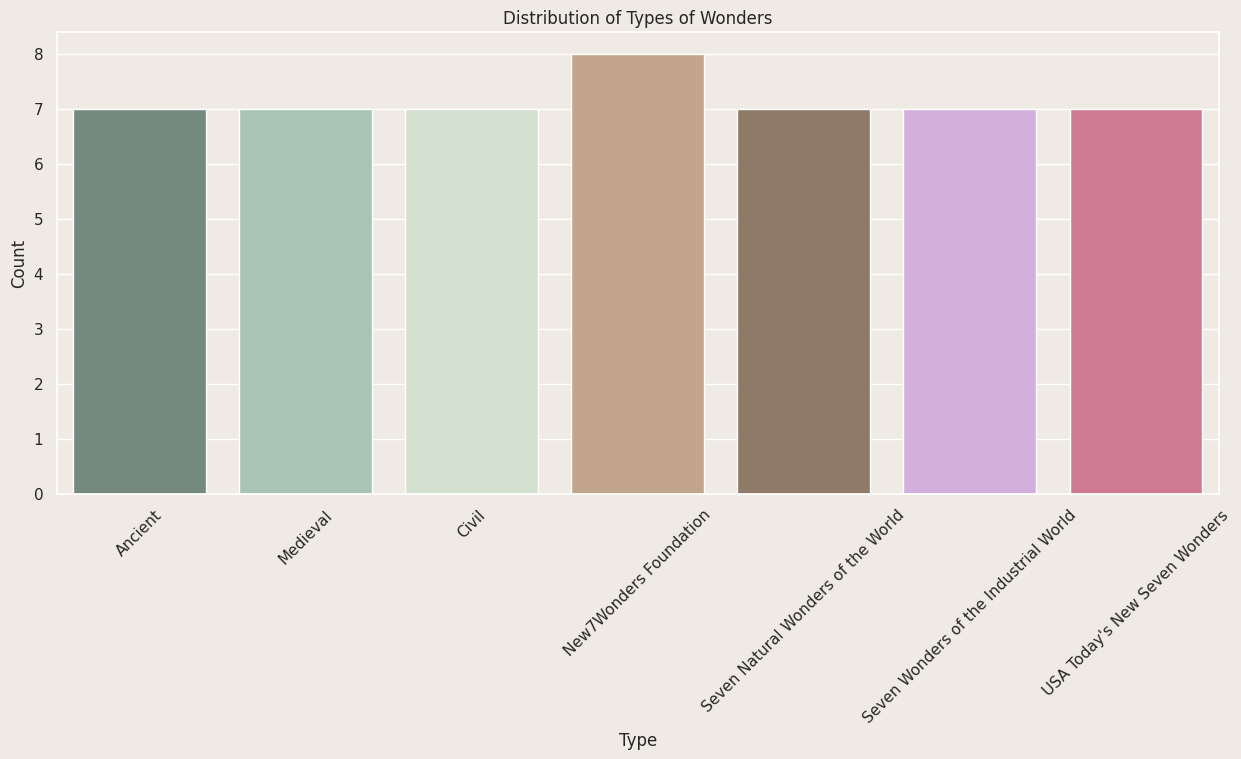

In [7]:
# TypeDistribution
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='Type', palette=palette)
plt.title('Distribution of Types of Wonders')
plt.xlabel('Type')
plt.xticks(rotation=45) 
#plt refers to the Matplotlib library.
#xticks is a function that sets or gets the x-axis tick locations and labels.
#rotation=45 is an argument passed to the xticks function, specifying that the x-axis tick labels should be rotated by 45 degrees.
plt.ylabel('Count')
plt.show()

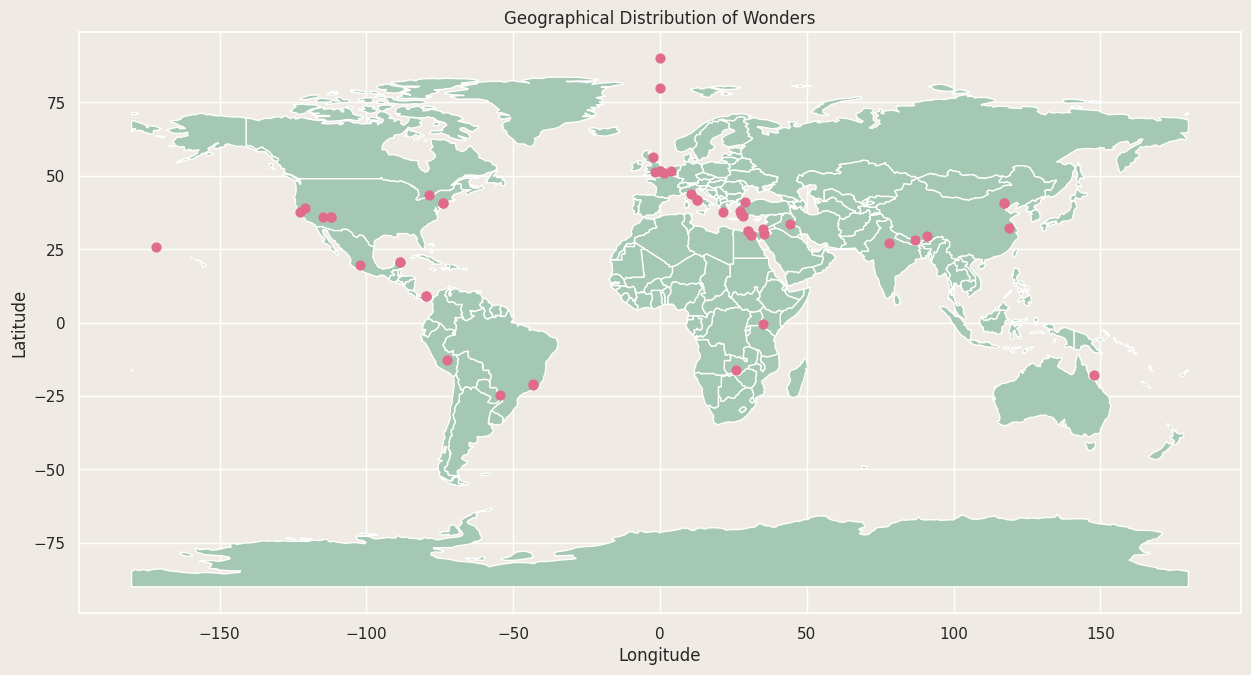

In [8]:
# Geograpgical Distribution
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15,10))
world.plot(ax=ax, color=palette[1])
gdf.plot(ax=ax, color=palette[-1], marker='o', markersize=40)
plt.title('Geographical Distribution of Wonders')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

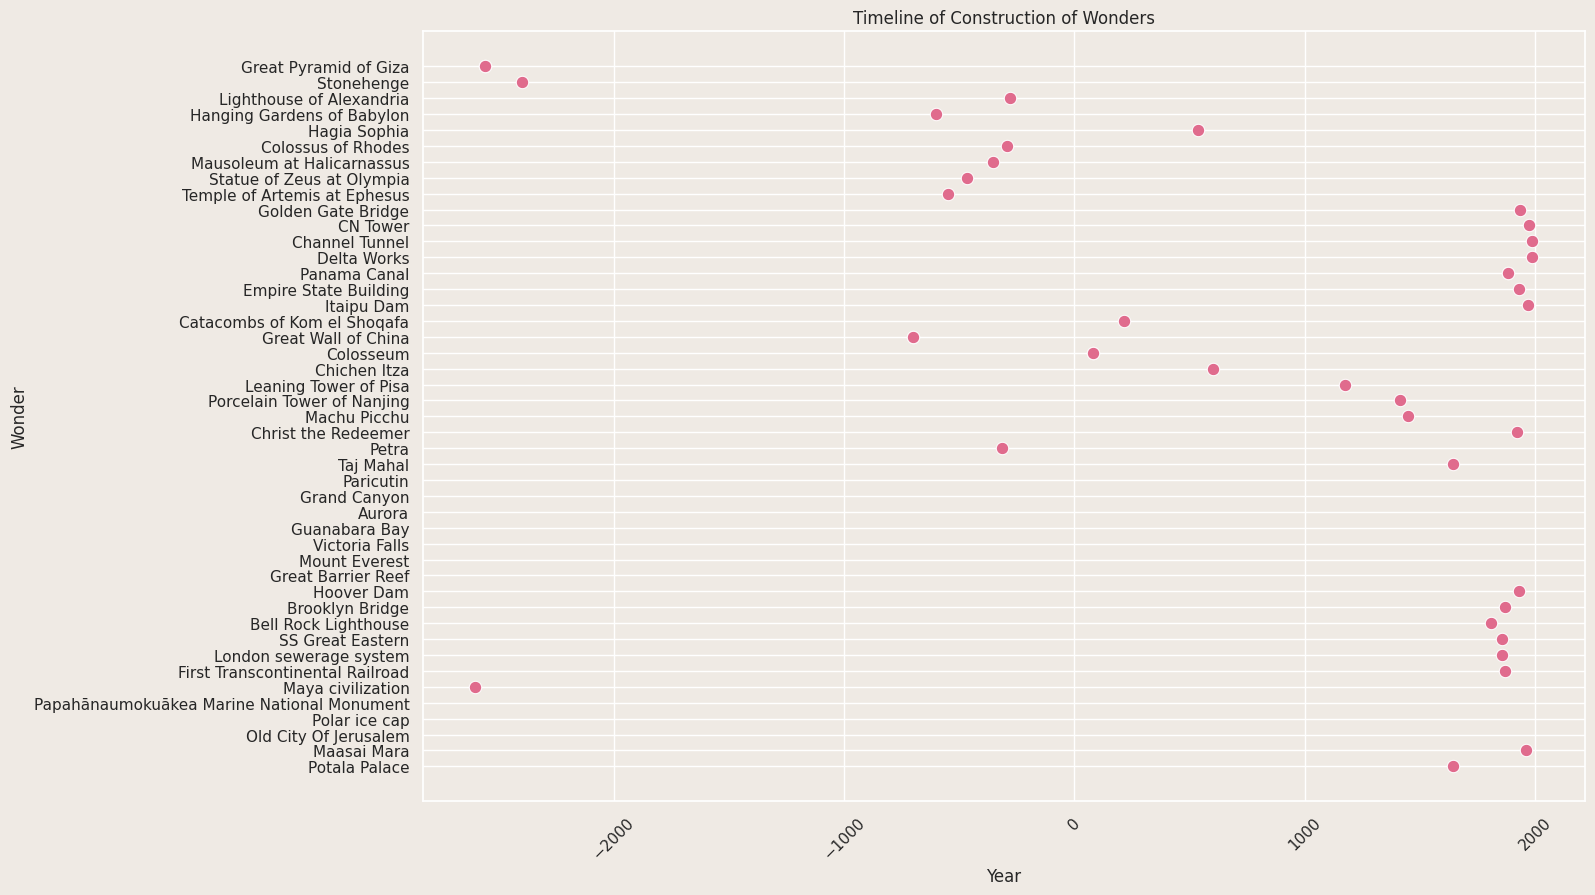

In [9]:
# Timeline of Construction
plt.figure(figsize=(15,10))
sns.scatterplot(data=data, x='year', y='Name', color=palette[-1], s=80)
plt.title('Timeline of Construction of Wonders')
plt.xlabel('Year')
plt.ylabel('Wonder')
plt.xticks(rotation=45)
plt.show()

# Credit:
https://www.kaggle.com/code/karnikakapoor/wonders-of-the-world-starter-notebook/notebook